Import the Spotify dataset. This contains real data from the Spotify platform about the popularity and other characteristics of songs including:

* artist: Name of the Artist.
* song: Name of the Track.
* duration_ms: Duration of the track in milliseconds.
* explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
year: Release Year of the track.
* popularity: The higher the value the more popular the song is.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
 *instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).* 
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* genre: Genre of the track.

Import the CSV file into a Pandas DataFrame. 

If you completed the Spotify-based assessment in the last chapter, recall that popularity had a significant correlation with duration_ms, explicit, and instrumentality. Let's investigate these relationships further.

Create a .scatterplot() with duration_ms on the x axis and popularity on the y axis.

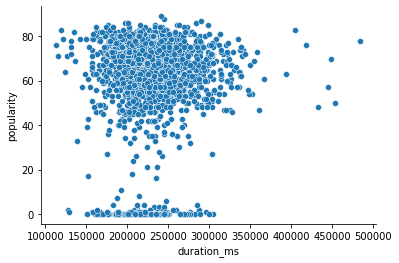

In [2]:
# Question 1:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('spotify.csv')

label = 'popularity'
feature = 'duration_ms'

# Create the plot
sns.scatterplot(data=df, x=feature, y=label);
sns.despine(top=True, right=True)
plt.show()

Next, create a .regplot() for the exact same relationship outlined in the question above. What does the relationship look like now with the regression line added?

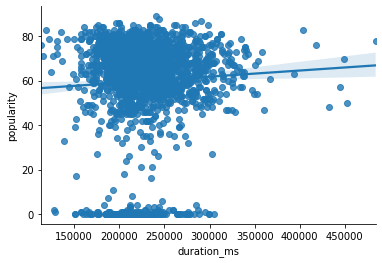

In [3]:
# Question 2:

label = 'popularity'
feature = 'duration_ms'

# Create the plot
sns.regplot(data=df, x=feature, y=label)
sns.despine(top=True, right=True)

plt.show()

Create the same .regplot() using instrumentalness as the feature (x axis). Calculate the regression equation and place the equation, R squared, and p-value as embedded text somewhere in the plot.

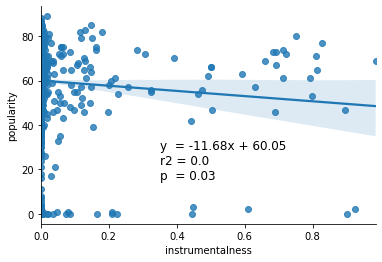

In [26]:
# Question 3:

label = 'popularity'
feature = 'instrumentalness'

# Create the plot
sns.regplot(data=df, x=feature, y=label)
sns.despine(top=True, right=True)

# Calculate the regression line
m, b, r, p, err = stats.linregress(df[feature], df[label])

# Add the formula, r squared, and p-value to the figure
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(0.4, 0.28, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

Repeat the .regplot() above using 'explicit' as the feature

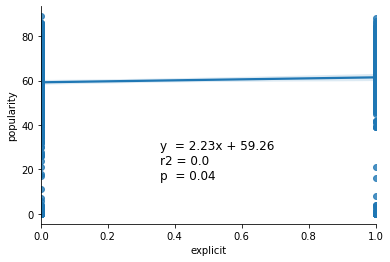

In [27]:
# Question 4:
label = 'popularity'
feature = 'explicit'

# Create the plot
sns.regplot(data=df, x=feature, y=label)
sns.despine(top=True, right=True)

# Calculate the regression line
m, b, r, p, err = stats.linregress(df[feature], df[label])

# Add the formula, r squared, and p-value to the figure
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 2))
plt.text(0.4, 0.28, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

Calculate the F stats and p-values for both measures of heteroscedasticity covered in this chapter for the relationship between instrumentalness and popularity

In [29]:
# Question 5:

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from statsmodels.formula.api import ols

feature = "instrumentalness"
label = "popularity"

# Fit the OLS model
model = ols(formula=f'{feature}~{label}', data=df).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)

,LM stat,LM p-value,F-stat,p-value
White,2.620,0.270,1.310,0.270
Breusch-Pagan,2.544,0.111,2.545,0.111


Create a 4D scatterplot using instrumentalness, popularity, and loudness for x, y, and z. Use explicit as the color.

In [33]:
# Question 6:
import pandas as pd
import plotly.express as px

fig = px.scatter_3d(df, x='loudness', y='popularity', z='instrumentalness', color='explicit')
fig.show()